# Agenda

- Exploratory Data Analysis
- Data Preprocessing


## Exploratory Data Analysis

- Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.
- It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data

## Data Preprocessing

-  Data Preprocessing focuses on processing the data and making it suitable for the model.

- Before building any machine learning model it is crucial to perform data preprocessing to feed the correct data to the model to learn and predict. Model performance depends on the quality of data feeded to the model to train.

- It involves various steps like 
  - Handling duplicates
  - Handling missing values
  - Handling outliers
  - Handling garbage data, incorrect or invalid data 
  - Changing data types 
  - Converting features into numerical data type
  - Standardising and normalising the data
  - Making transformations of variables as needed - log tranformation, power transformation etc 

- These are some of the common steps. But most of these data preprocessing steps depend on case to case basis.

## Table of Content

1. About dataset

2. Import necessary libraries

3. Load the dataset

4. Data Pre-processing

  - 4.1 Identifying and removing Duplicates from your data
  
  - 4.2 Removing unwanted characters and changing datatypes

  - 4.3 Handling categorical features
      - 4.3.1 One hot encoding
      - 4.3.2 Label Encoding
  
  - 4.4 Identifying and imputing missing values
    - Ways of detecting missing values & Standard and non-standard missing values
    - Basic imputation methods for replacing missing values

  - 4.5 Outlier detection & Imputation- visually, and statistically

  - 4.6 Standardization & Normalization
  

<a id="ad"> </a>
## 1. About dataset

- Amazon.com, Inc. is an American multinational conglomerate that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook.


- Amazon Top Rated Smartphones & Accessories 2021 Dataset was scraped from amazon.in website of the e-commerce amazon India. the dataset contains smartphones title with its specification according to its rating and number of review count in the dataset column. there is a piece of additional information about the smartphone. that is its offer price and actual price with its discount percentage and delivery options


- Amazon Top Rated Smartphones & Accessories 2021 dataset is scraped from the e-commerce website.

# Below part (until missing values) is already covered in the session. Any doubts?

<a id="inl"> </a>
## 2. Import the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

<a id="ld"> </a>
## 3. Load the dataset.

In [ ]:
df = pd.read_csv('Amazon_data.csv')
df.head()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2 out of 5 stars,"95,519","₹13,999","₹15,999","Save ₹2,000 (13%)",FREE Delivery by Amazon,NaN
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN


##### Lets check the shape of the dataset.

In [ ]:
df.shape

(1367, 8)

###### Lets check the info of the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Smartphone                     1367 non-null   object
 1   Rating                         1367 non-null   object
 2   Reviews count                  1367 non-null   object
 3   Offer price                    1153 non-null   object
 4   Actual price                   1041 non-null   object
 5   Saving                         1150 non-null   object
 6   Delivery                       1367 non-null   object
 7   Status of stock & more offers  498 non-null    object
dtypes: object(8)
memory usage: 85.6+ KB


##### Note: Datatype of all the features is in object type, We need to remove unwanted characters in the data and convert the datatypes to there suitable datatypes. 

<a id="dp"> </a>
## 4. Data Pre-processing

<a id="fdd"> </a>
### 4.1 Find and drop duplicate values.

###### Lets check for the duplicate rows in the data and drop those.

In [ ]:
##Identify duplicates records in the data
len(df[df.duplicated()])

56

In [ ]:
#Removing Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
## Check for duplicate values again
len(df[df.duplicated()])

0

###### We had 56 duplicated rows, we have successfully dropped them.

<a id="ru"> </a>
### 4.2 Removing unwanted characters and changing the datatype

In [ ]:
df.head(2)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN


- We can make the following obervations
1. Rating columns can be made numeric by extracting the rating value from it
2. Review count can be made numeric by removing commas from the values
3. Price columns can be made numeric by removing commas, rupees sign from the values
4. We can extract saving value or percentage from the Saving column and make it numeric

#### 4.2.1 Let's handle Rating column

In [ ]:
## Splitting the string and Retreving the numeric value and converting the 'feature rating' to float datatype.
df['Rating'] = df['Rating'].str.split(' ').str.get(0).astype(float)

#### 4.2.2 Let's handle Reviews count column

In [ ]:
## Replacing comma and converting feature 'Reviews count' as integer.
df['Reviews count'] = df['Reviews count'].str.replace(',','').astype(int)

#### 4.2.3 Let's deal with Price columns

In [ ]:
## Replacing comma and '₹' and converting feature 'Offer price' as integer.
df['Offer price'] = df['Offer price'].str.replace(',','')
df['Offer price'] = df['Offer price'].str.replace('₹','')
df['Offer price'] = df['Offer price'].str.replace('.','')

## Note:- Since feature offer price is having null values, the nan values dtype will be float by default, if we try converting 
## datatype into integer it will throw an error, So converting only not null values into int.
## After imputing null values we will convert those datatype also.
df.loc[df['Offer price'].notnull(), 'Offer price'] = df.loc[df['Offer price'].notnull(), 'Offer price'].apply(int)

In [ ]:
## Replacing comma and '₹' and converting feature 'Actual price' as integer.
df['Actual price'] = df['Actual price'].str.replace(',','')
df['Actual price'] = df['Actual price'].str.replace('₹','')
df['Actual price'] = df['Actual price'].str.replace('.','')

df.loc[df['Actual price'].notnull(), 'Actual price'] = df.loc[df['Actual price'].notnull(), 'Actual price'].apply(int)

#### 4.2.4 Let's handle Saving feature

In [ ]:
## Splitting the string and retriveing the numeric value.
df['Saving'] = df['Saving'].str.split(' ').str.get(1)

## Replacing comma and '₹' and converting feature 'Actual price' as integer.
df['Saving'] = df['Saving'].str.replace(',','')
df['Saving'] = df['Saving'].str.replace('₹','')
df['Saving'] = df['Saving'].str.replace('.','')
df['Saving'] = df['Saving'].replace(['it','Delivery'],np.nan)

df.loc[df['Saving'].notnull(), 'Saving'] = df.loc[df['Saving'].notnull(), 'Saving'].apply(int)

In [ ]:
df.head(2)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2,87809,9499,10999,1500,FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2,74587,6999,8499,1500,FREE Delivery by Amazon,NaN


### 4.3 Handling Categorical Features.

#### 4.3.1 One Hot Encoding.

In [ ]:
df['Delivery'].unique()

array(['FREE Delivery by Amazon', 'Paid', 'First Order Free Delivery'],
      dtype=object)

We have 3 unique levels in the categorical variable 'Delivery', Lets try Implimenting One Hot Encoding on the feature Delivery.

In [ ]:
pd.get_dummies(df['Delivery'])

,FREE Delivery by Amazon,First Order Free Delivery,Paid
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1362,1,0,0
1363,1,0,0
1364,1,0,0
1365,1,0,0


In [ ]:
## drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation.
pd.get_dummies(df['Delivery'],drop_first=True)

,First Order Free Delivery,Paid
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1362,0,0
1363,0,0
1364,0,0
1365,0,0


#### 4.3.2 Label Encoding.

In [ ]:
## Lets make a copy of the dataframe
dfc = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Le = LabelEncoder()

In [ ]:
arr = Le.fit_transform(dfc['Delivery'])

## when we label encode the data, the output will be in the format of array, So convert the array to dataframe.
delivery = pd.DataFrame(arr,columns=['Delivery'])
delivery.value_counts()

Delivery
2           652
0           584
1            75
dtype: int64

In [ ]:
## Since the feature Delivery doesnot have an hierarchy in the categories, We prefer One Hot encoding over Label Encoding.

<a id="m"> </a>
### 4.4 Dealing with missing values.

In [ ]:
# How to check null values
df.isnull().sum()

Smartphone                         0
Rating                             0
Reviews count                      0
Offer price                      206
Actual price                     313
Saving                           313
Delivery                           0
Status of stock & more offers    838
dtype: int64

In [ ]:
# How to check null values in percentage
df.isnull().sum()/len(df)*100

Smartphone                        0.000000
Rating                            0.000000
Reviews count                     0.000000
Offer price                      15.713196
Actual price                     23.874905
Saving                           23.874905
Delivery                          0.000000
Status of stock & more offers    63.920671
dtype: float64

- We have missing values in both numeric and categorical features.
- For feature Offer price we will check distribution of the data and treat accordingly.
- For features Actual price and Saving we will use KNN imputation technique.
- For categorical data we impute null values using mode imputation technique.
- The feature Status of stock & more offers is having missing values more than 60%, lets drop it.

#### 4.4.1 Standard and Non standard Null values
-  What isnull() function recognises as missing value

In [ ]:
pd.DataFrame({'value' : df['Offer price'], 'Missing?' : df['Offer price'].isnull()}).head(10)

,value,Missing?
0,9499,False
1,6999,False
2,6999,False
3,13999,False
4,9499,False
5,11499,False
6,6999,False
7,NaN,True
8,24999,False
9,10499,False


* Only 'NaN' is recognised as missing value
* Depending on the context, we decide what should be a missing value
* Garbage values are not recognised as null values

#### 4.4.2 Dropping features having more than 45% null values

In [ ]:
df.drop(['Status of stock & more offers'],axis=1,inplace=True)

#### 4.4.3 Let's analyse price columns

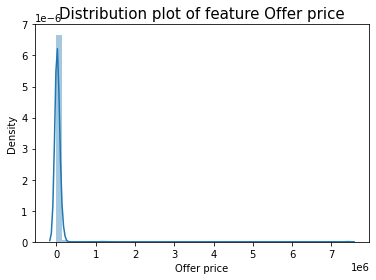

In [ ]:
sns.distplot(df['Offer price'])
plt.title('Distribution plot of feature Offer price',fontsize=15)
plt.show()

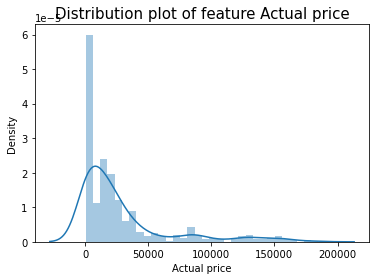

In [ ]:
sns.distplot(df['Actual price'])
plt.title('Distribution plot of feature Actual price',fontsize=15)
plt.show()

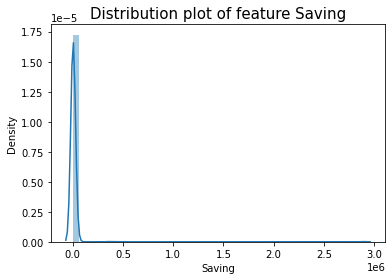

In [ ]:
sns.distplot(df['Saving'])
plt.title('Distribution plot of feature Saving',fontsize=15)
plt.show()

- Since all the numeric features are skewed, lets treat those missing values using median imputation and KNN Imputation  technique.

In [ ]:
df['Offer price'] = df['Offer price'].fillna(df['Offer price'].median())

In [ ]:
## KNN imputation technique.
imputer = KNNImputer(n_neighbors=1)
df.iloc[:,[4,5]] = imputer.fit_transform(df.iloc[:,[4,5]])

In [ ]:
df.isnull().sum()

Smartphone       0
Rating           0
Reviews count    0
Offer price      0
Actual price     0
Saving           0
Delivery         0
dtype: int64

- We have successfully dealt with missing values.

In [ ]:
## Now we have imputed null values, lets convert variables dataypes to its suitable datatypes.
df[['Offer price','Actual price','Saving']] = df[['Offer price','Actual price','Saving']].astype(int)

In [ ]:
## Lets make a copy of the dataframe after missing value treatment. Later will use this data for Visualization.
df1 = df.copy()

##### Lets check the statistical summary of the data.

In [ ]:
df.describe()

,Rating,Reviews count,Offer price,Actual price,Saving
count,1311.000000,1311.00000,1.311000e+03,1311.000000,1.311000e+03
mean,4.347521,7295.59878,3.055888e+04,28102.105263,7.324551e+03
std,0.325001,21314.64243,2.117472e+05,32758.342288,8.050069e+04
min,4.000000,1.00000,5.000000e+01,299.000000,1.000000e+00
25%,4.100000,7.00000,2.999000e+03,4999.000000,1.000000e+03
50%,4.200000,341.00000,1.338900e+04,22999.000000,3.500000e+03
75%,4.600000,2323.00000,2.299450e+04,28102.000000,7.324000e+03
max,5.000000,243715.00000,7.409164e+06,184800.000000,2.890836e+06


---------------------------------------------------------------------------------------------

# Let's Start with Outliers

<a id="o"> </a>
### 4.5 Dealing with Outliers
Outliers are extreme values that tend to influce the data distribution significantly without adding much information.
- Sometimes they might be valid values
- Handling outliers becomes very crucial to build a good model

#### 4.5.1 Identify outliers with visualization tools

In [ ]:
df_num = df.select_dtypes(include=np.number)
df_num.head(2)

,Rating,Reviews count,Offer price,Actual price,Saving
0,4.2,87809,9499,10999,1500
1,4.2,74587,6999,8499,1500


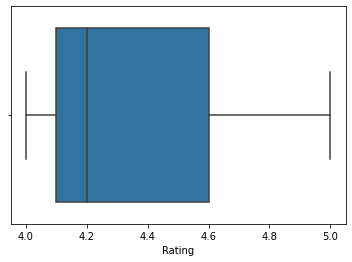

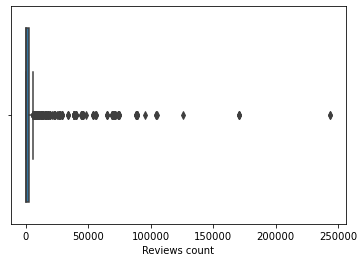

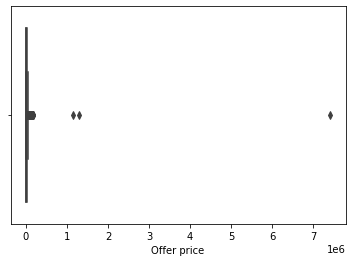

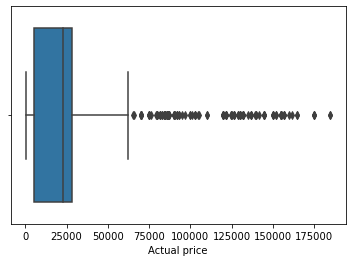

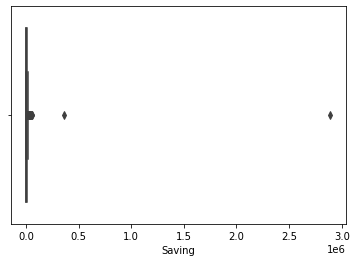

In [ ]:
for i in df_num:
    sns.boxplot(df_num[i])
    plt.show()

#### 4.5.2 Let's check the skewness

In [ ]:
df_num.skew()  ## As we can see that some features are highly skewed towards right.

Rating            0.904333
Reviews count     5.164504
Offer price      32.635145
Actual price      2.391609
Saving           35.201497
dtype: float64

#### 4.5.3 Handling outliers
There are various ways we can deal with outliers.
- We can try transformations using log method, Z-score transformation
- We can try capping using IQR method
- We can impute the data using an appropriate value

#### 4.5.4 Using log transformation

In [ ]:
df_copy = df.copy()

- For feature *'Reviews count'*, lets apply Log transformation technique in order to reduce the skewness.

In [ ]:
df['Reviews count'] = np.log(df['Reviews count'])

- For feature *'Offer price'*, lets apply Log transformation technique in order to reduce the skewness.

In [ ]:
df['Offer price'] = np.log(df['Offer price'])

- For feature *'Actual price'*, lets apply Log transformation technique in order to reduce the skewness.

In [ ]:
df['Actual price'] = np.log(df['Actual price'])

- For feature *'Saving'*, lets apply Log transformation technique in order to reduce the skewness.

In [ ]:
df['Saving'] = np.log(df['Saving'])

In [ ]:
df.skew()

Rating           0.904333
Reviews count   -0.036178
Offer price     -0.234341
Actual price    -0.536487
Saving          -0.711538
dtype: float64

In [ ]:
df_num = df.select_dtypes(include=np.number)

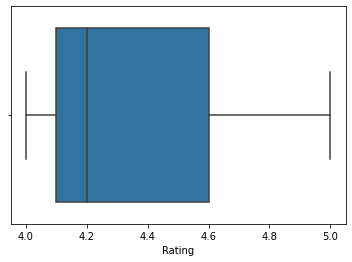

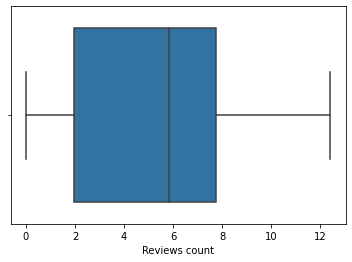

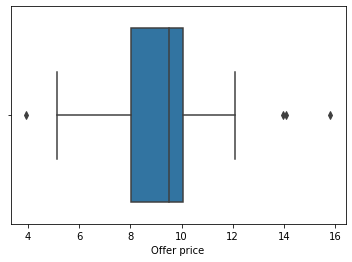

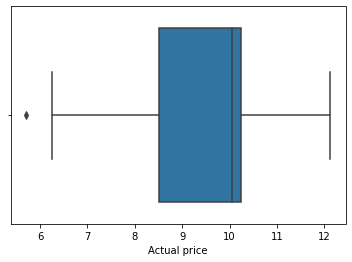

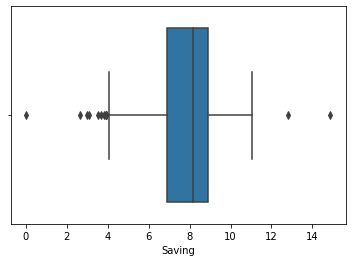

In [ ]:
for i in df_num:
    sns.boxplot(df_num[i])
    plt.show()

##### As we can see we have successfully dealt with outliers, We have reduced the outliers impact on distribution of the data which was causing the distribution with high skewness, Now we have reduced the skewness by applying transformation technique.

#### 4.5.5 Using IQR Method

In [ ]:
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3-Q1

In [ ]:
df_out = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) |(df_copy > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
df_out.shape

(922, 7)

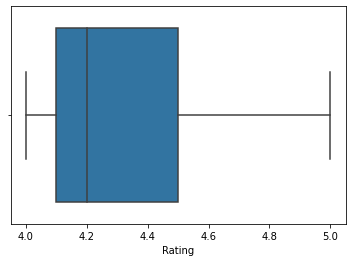

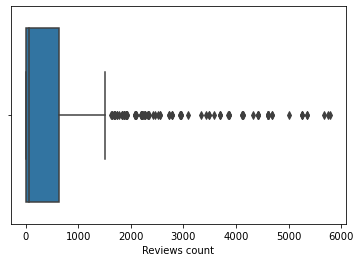

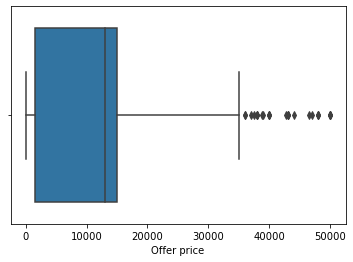

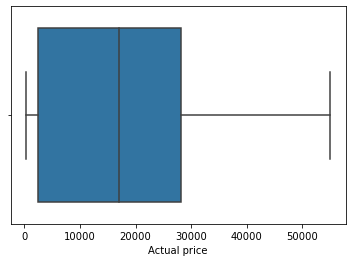

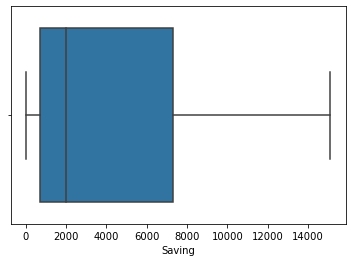

In [ ]:
df_num1 = df_out.select_dtypes(include=np.number)
for i in df_num1:
    sns.boxplot(df_num1[i])
    plt.show()

#### 4.5.6 Using Capping Technique.

In [ ]:
## make a copy of the dataframe
dfc_2 = df.copy()      

## Include only numeric columns
dfc_2_num = dfc_2.select_dtypes(include=np.number)

## Calculate IQR
Q1 = dfc_2_num.quantile(0.25)
Q3 = dfc_2_num.quantile(0.75)
IQR = Q3-Q1

ll = Q1-(1.5*IQR)
UL = Q3+(1.5*IQR)

In [ ]:
# Replace every outlier on the lower side by the lower whisker
dfc_2_num = pd.DataFrame(np.where(dfc_2_num>UL,UL,dfc_2_num),columns=dfc_2_num.columns)

# Replace every outlier on the upper side by the upper whisker 
dfc_2_num = pd.DataFrame(np.where(dfc_2_num<ll,ll,dfc_2_num),columns=dfc_2_num.columns)

<AxesSubplot:>

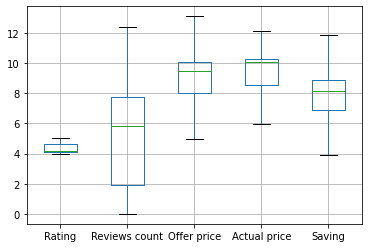

In [ ]:
dfc_2_num.boxplot() ## We can visualize that we successfully replaced the outliers with the Upperlimit and lowerlimit values. 

<a id="n"> </a>
### 4.6 Normalization & Standardisation


#### 4.6.1 Normalization

- Lets make a copy of the dataset and normalize the data.

In [ ]:
df_copy1 = df.copy()

In [ ]:
mm = MinMaxScaler()

In [ ]:
df_copy1.iloc[:,1:6] = mm.fit_transform(df_copy1.iloc[:,1:6])
df_copy1.head(2)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",0.2,0.917699,0.440688,0.560969,0.491577,FREE Delivery by Amazon
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",0.2,0.904542,0.415036,0.520846,0.491577,FREE Delivery by Amazon


In [ ]:
df_copy1.describe()

,Rating,Reviews count,Offer price,Actual price,Saving
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,0.347521,0.420532,0.445140,0.601577,0.525560
std,0.325001,0.279053,0.123373,0.207049,0.094220
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.156881,0.343855,0.438265,0.464323
50%,0.200000,0.470171,0.469517,0.675750,0.548530
75%,0.600000,0.624860,0.514941,0.706931,0.598163
max,1.000000,1.000000,1.000000,1.000000,1.000000


##### As we can see from the statistical summary of the normalized data the value range of the features is between 0 and 1.

<a id="s"> </a>
#### 4.6.2 Standardization

In [ ]:
df_copy2 = df.copy()

In [ ]:
ss = StandardScaler()

In [ ]:
df_copy2.iloc[:,1:6] = ss.fit_transform(df_copy2.iloc[:,1:6])
df_copy2.head(2)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",-0.454083,1.782303,-0.036103,-0.196204,-0.360814,FREE Delivery by Amazon
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",-0.454083,1.735136,-0.244106,-0.390064,-0.360814,FREE Delivery by Amazon


In [ ]:
df_copy2.describe()

,Rating,Reviews count,Offer price,Actual price,Saving
count,1.311000e+03,1.311000e+03,1.311000e+03,1.311000e+03,1.311000e+03
mean,2.769545e-15,8.702252e-16,-1.028078e-16,2.830180e-16,6.970439e-16
std,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-1.069701e+00,-1.507570e+00,-3.609465e+00,-2.906590e+00,-5.580120e+00
25%,-7.618917e-01,-9.451660e-01,-8.212794e-01,-7.890612e-01,-6.501867e-01
50%,-4.540828e-01,1.779515e-01,1.976616e-01,3.583712e-01,2.438863e-01
75%,7.771530e-01,7.324992e-01,5.659826e-01,5.090278e-01,7.708637e-01
max,2.008389e+00,2.077344e+00,4.499137e+00,1.925025e+00,5.037351e+00


In [ ]:
df_copy2_num = df_copy2.select_dtypes(include=np.number)

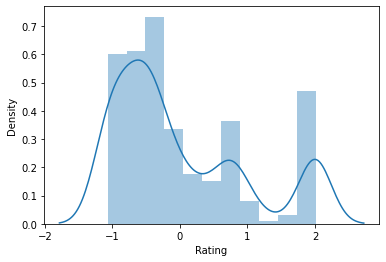

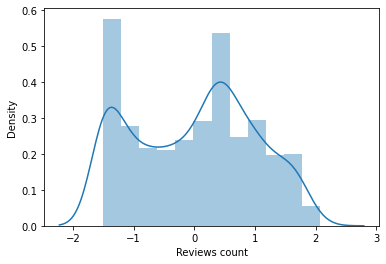

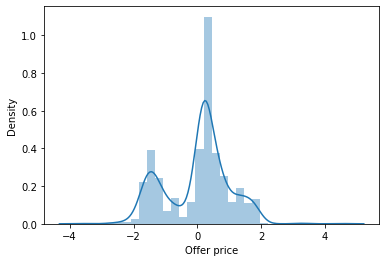

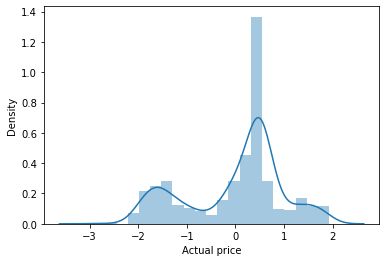

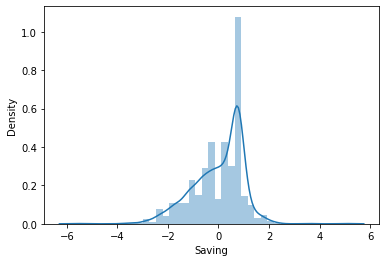

In [ ]:
for i in df_copy2_num:
    sns.distplot(df_copy2_num[i])
    plt.show()

##### As we can see from the above distribution plots plotted with the data which we standarized, follows Standard normal distribution with mean 0 and standard deviation 1.

In [ ]:
df_copy2_num.std()

Rating           1.000382
Reviews count    1.000382
Offer price      1.000382
Actual price     1.000382
Saving           1.000382
dtype: float64

### 4.7 Pandas Profiling
Generates profile reports from a pandas DataFrame. 
pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

Link - https://pypi.org/project/pandas-profiling/

In [ ]:
profile = df.profile_report(title='Report on Amazon Data')
profile.to_file(output_file="Amazon_Data.html")

You can see the report in your directory in html format. It will give you a structured summarized view of statistics of every columns with interactive options to explore more.